In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from fancyimpute import IterativeImputer

from tensorflow.keras.callbacks import TensorBoard
import datetime

In [132]:
cci_index = pd.read_csv("./Data/Final Final CCI.csv")

In [133]:
cci_index

,Month,CCI
0,2012-07,59.0
1,2012-08,57.0
2,2012-09,59.0
3,2012-10,59.0
4,2012-11,60.0
...,...,...
141,2024-04,44.0
142,2024-05,41.0
143,2024-06,48.0
144,2024-07,52.0


In [134]:
cat1 = pd.read_csv("./Data/Trends/Economy_data_full.csv")
cat2 = pd.read_csv("./Data/Trends/Employment_data_full.csv")
cat3 = pd.read_csv("./Data/Trends/Living_Standard_data_full.csv")
cat4 = pd.read_csv("./Data/Trends/Price_Level_data_full.csv")

##### ---------------------------------------------------------------

In [135]:
data = pd.concat([cci_index, cat1[:146], cat2[:146], cat3[:146], cat4[:146]], axis=1)
data = data.reset_index(drop=True)
data

,Month,CCI,Month,Supply chain,External debt,Government spending,Workforce productivity,Global economy,Purchasing power,National savings,...,Cost of living,Hospital cost,Grocery price,Vegetable price,Electricity price,Market prices,Online shopping,Wholesale price,Inflation rate,Fuel price
0,2012-07,59.0,2012-07,47,0,0,0,0,0,57,...,35,0,0,0,0,50,3,0,17,6
1,2012-08,57.0,2012-08,40,0,0,0,0,0,65,...,28,0,0,0,0,85,4,0,17,7
2,2012-09,59.0,2012-09,34,0,0,0,0,0,69,...,50,0,0,0,0,84,4,0,19,5
3,2012-10,59.0,2012-10,30,0,0,0,0,0,54,...,40,0,0,0,0,100,4,0,0,0
4,2012-11,60.0,2012-11,45,0,85,0,0,0,36,...,49,0,0,0,0,59,4,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2024-04,44.0,2024-04,59,18,0,0,0,0,28,...,50,43,0,62,55,30,8,61,21,32
142,2024-05,41.0,2024-05,77,0,19,0,49,0,34,...,50,40,0,67,55,32,7,78,19,36
143,2024-06,48.0,2024-06,78,18,34,0,0,0,27,...,41,46,28,55,60,37,7,84,16,38
144,2024-07,52.0,2024-07,73,0,0,0,50,0,21,...,49,25,0,44,64,29,6,90,18,44


In [136]:
correlations = data.drop("Month", axis = 1).corrwith(data['CCI'], method="spearman")

high_corr_columns = correlations[np.abs(correlations) > 0.5].index.tolist()

print("Columns with correlation > 0.5:")
print(high_corr_columns)

print("Number of variables: ", len(high_corr_columns))

Columns with correlation > 0.5:
['CCI', 'Supply chain', 'External debt', 'Economic crisis', 'GDP', 'Foreign reserves', 'Financial services', 'Part-time job', 'Minimum wage', 'Job vacancies', 'Freelancing', 'Full-time job', 'Job security', 'Remote work', 'Employee benefits', 'Sustainability', 'Education quality', 'Climate', 'Health insurance', 'Life expectancy', 'Quality of life', 'Childcare', 'Air quality', 'Crime rate', 'Amenity', 'Meat price', 'Utility bill', 'Water bill', 'Import price', 'Train ticket price', 'Bus ticket price', 'House price', 'Export price', 'Education price', 'Gold price', 'Cost of living', 'Hospital cost', 'Vegetable price', 'Electricity price', 'Online shopping', 'Wholesale price', 'Fuel price']
Number of variables:  42


In [137]:
final_data = data[high_corr_columns]
final_data

,CCI,Supply chain,External debt,Economic crisis,GDP,Foreign reserves,Financial services,Part-time job,Minimum wage,Job vacancies,...,Export price,Education price,Gold price,Cost of living,Hospital cost,Vegetable price,Electricity price,Online shopping,Wholesale price,Fuel price
0,59.0,47,0,17,48,0,76,61,0,20,...,0,0,12,35,0,0,0,3,0,6
1,57.0,40,0,13,46,0,76,57,0,19,...,0,0,13,28,0,0,0,4,0,7
2,59.0,34,0,0,57,0,100,57,0,24,...,0,0,13,50,0,0,0,4,0,5
3,59.0,30,0,0,63,0,63,59,42,24,...,0,0,13,40,0,0,0,4,0,0
4,60.0,45,0,0,55,0,80,57,0,24,...,0,0,14,49,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,44.0,59,18,11,64,11,19,63,52,56,...,62,55,42,50,43,62,55,8,61,32
142,41.0,77,0,17,61,6,19,72,60,69,...,43,62,38,50,40,67,55,7,78,36
143,48.0,78,18,12,71,7,19,75,59,73,...,48,84,35,41,46,55,60,7,84,38
144,52.0,73,0,13,63,7,23,68,52,73,...,48,52,30,49,25,44,64,6,90,44


In [138]:
train_df = final_data
train_df.iloc[:,1:] = train_df.iloc[:,1:].replace(0, np.nan)

In [139]:
imputer = IterativeImputer(max_iter=100)
train_df.iloc[:,1:] = imputer.fit_transform(train_df.iloc[:,1:]).round(0)

train_df

,CCI,Supply chain,External debt,Economic crisis,GDP,Foreign reserves,Financial services,Part-time job,Minimum wage,Job vacancies,...,Export price,Education price,Gold price,Cost of living,Hospital cost,Vegetable price,Electricity price,Online shopping,Wholesale price,Fuel price
0,59.0,47,61.0,17.0,48,21.0,76,61,26.0,20,...,63.0,56.0,12,35,45.0,23.0,32.0,3,20.0,6.0
1,57.0,40,64.0,13.0,46,23.0,76,57,24.0,19,...,63.0,56.0,13,28,45.0,24.0,29.0,4,20.0,7.0
2,59.0,34,82.0,23.0,57,39.0,100,57,29.0,24,...,68.0,60.0,13,50,47.0,31.0,36.0,4,34.0,5.0
3,59.0,30,90.0,34.0,63,50.0,63,59,42.0,24,...,71.0,57.0,13,40,41.0,28.0,41.0,4,24.0,13.0
4,60.0,45,73.0,24.0,55,30.0,80,57,30.0,24,...,66.0,60.0,14,49,45.0,28.0,38.0,4,27.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,44.0,59,18.0,11.0,64,11.0,19,63,52.0,56,...,62.0,55.0,42,50,43.0,62.0,55.0,8,61.0,32.0
142,41.0,77,21.0,17.0,61,6.0,19,72,60.0,69,...,43.0,62.0,38,50,40.0,67.0,55.0,7,78.0,36.0
143,48.0,78,18.0,12.0,71,7.0,19,75,59.0,73,...,48.0,84.0,35,41,46.0,55.0,60.0,7,84.0,38.0
144,52.0,73,16.0,13.0,63,7.0,23,68,52.0,73,...,48.0,52.0,30,49,25.0,44.0,64.0,6,90.0,44.0


In [140]:
mid_values = train_df.iloc[63,1:]

train_df.iloc[:,1:] = (train_df.iloc[:,1:] / mid_values).round(3)
train_df

,CCI,Supply chain,External debt,Economic crisis,GDP,Foreign reserves,Financial services,Part-time job,Minimum wage,Job vacancies,...,Export price,Education price,Gold price,Cost of living,Hospital cost,Vegetable price,Electricity price,Online shopping,Wholesale price,Fuel price
0,59.0,1.679,1.794,-5.667,1.067,4.2,2.452,0.847,1.444,0.417,...,1.125,1.12,0.923,1.207,1.406,1.278,1.231,0.214,0.714,1.000
1,57.0,1.429,1.882,-4.333,1.022,4.6,2.452,0.792,1.333,0.396,...,1.125,1.12,1.000,0.966,1.406,1.333,1.115,0.286,0.714,1.167
2,59.0,1.214,2.412,-7.667,1.267,7.8,3.226,0.792,1.611,0.500,...,1.214,1.20,1.000,1.724,1.469,1.722,1.385,0.286,1.214,0.833
3,59.0,1.071,2.647,-11.333,1.400,10.0,2.032,0.819,2.333,0.500,...,1.268,1.14,1.000,1.379,1.281,1.556,1.577,0.286,0.857,2.167
4,60.0,1.607,2.147,-8.000,1.222,6.0,2.581,0.792,1.667,0.500,...,1.179,1.20,1.077,1.690,1.406,1.556,1.462,0.286,0.964,1.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,44.0,2.107,0.529,-3.667,1.422,2.2,0.613,0.875,2.889,1.167,...,1.107,1.10,3.231,1.724,1.344,3.444,2.115,0.571,2.179,5.333
142,41.0,2.750,0.618,-5.667,1.356,1.2,0.613,1.000,3.333,1.438,...,0.768,1.24,2.923,1.724,1.250,3.722,2.115,0.500,2.786,6.000
143,48.0,2.786,0.529,-4.000,1.578,1.4,0.613,1.042,3.278,1.521,...,0.857,1.68,2.692,1.414,1.438,3.056,2.308,0.500,3.000,6.333
144,52.0,2.607,0.471,-4.333,1.400,1.4,0.742,0.944,2.889,1.521,...,0.857,1.04,2.308,1.690,0.781,2.444,2.462,0.429,3.214,7.333


In [141]:
train_df["lag1"] = train_df["CCI"].shift(1)
train_df["lag2"] = train_df["CCI"].shift(2)
train_df["lag3"] = train_df["CCI"].shift(3)
train_df.dropna(inplace=True)

In [142]:
#train_df["Time"] = train_df.index

In [143]:
train_df

,CCI,Supply chain,External debt,Economic crisis,GDP,Foreign reserves,Financial services,Part-time job,Minimum wage,Job vacancies,...,Cost of living,Hospital cost,Vegetable price,Electricity price,Online shopping,Wholesale price,Fuel price,lag1,lag2,lag3
3,59.0,1.071,2.647,-11.333,1.400,10.0,2.032,0.819,2.333,0.500,...,1.379,1.281,1.556,1.577,0.286,0.857,2.167,59.0,57.0,59.0
4,60.0,1.607,2.147,-8.000,1.222,6.0,2.581,0.792,1.667,0.500,...,1.690,1.406,1.556,1.462,0.286,0.964,1.833,59.0,59.0,57.0
5,62.0,1.143,1.941,-4.000,1.044,5.4,2.355,0.611,1.278,0.375,...,1.034,1.406,1.444,1.192,0.286,0.857,1.167,60.0,59.0,59.0
6,67.0,1.714,2.088,-3.333,1.333,5.6,2.903,0.694,1.222,0.479,...,1.172,1.469,1.500,1.269,0.214,1.107,0.833,62.0,60.0,59.0
7,68.0,1.607,2.147,-4.667,1.356,5.8,3.129,0.708,1.278,0.583,...,1.034,1.500,1.667,1.269,0.286,1.250,0.833,67.0,62.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,44.0,2.107,0.529,-3.667,1.422,2.2,0.613,0.875,2.889,1.167,...,1.724,1.344,3.444,2.115,0.571,2.179,5.333,36.0,27.0,24.0
142,41.0,2.750,0.618,-5.667,1.356,1.2,0.613,1.000,3.333,1.438,...,1.724,1.250,3.722,2.115,0.500,2.786,6.000,44.0,36.0,27.0
143,48.0,2.786,0.529,-4.000,1.578,1.4,0.613,1.042,3.278,1.521,...,1.414,1.438,3.056,2.308,0.500,3.000,6.333,41.0,44.0,36.0
144,52.0,2.607,0.471,-4.333,1.400,1.4,0.742,0.944,2.889,1.521,...,1.690,0.781,2.444,2.462,0.429,3.214,7.333,48.0,41.0,44.0


##### ---------------------------------------------------------------------

In [144]:
X = train_df.iloc[:,1:]
y = train_df["CCI"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameters
num_keywords = X_train.shape[1] - 1  # Exclude month
embedding_dim = 32  # Dimension of attention space

In [147]:
# Attention Layer
class Attention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features):
        score = tf.nn.tanh(self.W(features))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

# Build the model
def build_prediction_model():
    inputs = tf.keras.Input(shape=(num_keywords + 1,))  # +1 for month

    # Separate keyword and month inputs
    keyword_inputs = inputs[:, :-1]  # Keywords only
    month_inputs = tf.expand_dims(inputs[:, -1], axis=-1)  # Month as separate input

    # Attention mechanism on keyword trends
    attention_out = Attention(32)(keyword_inputs)

    # Reshape attention output to (None, 1) for concatenation
    attention_out = tf.expand_dims(attention_out, axis=-1)

    # Concatenate the attention output with month encoding
    concat = tf.keras.layers.Concatenate(axis=-1)([attention_out, month_inputs])
    
    # Dense layers
    dense1 = tf.keras.layers.Dense(64, activation="relu")(concat)
    dense2 = tf.keras.layers.Dense(32, activation="relu")(dense1)
    output = tf.keras.layers.Dense(1)(dense2)

    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

In [148]:
# Initialize the model
model = build_prediction_model()
model.summary()

# TensorBoard setup
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 44)]         0           []                               
                                                                                                  
 tf.__operators__.getitem_10 (S  (None, 43)          0           ['input_6[0][0]']                
 licingOpLambda)                                                                                  
                                                                                                  
 attention_5 (Attention)        (None,)              1441        ['tf.__operators__.getitem_10[0][
                                                                 0]']                             
                                                                                            

In [149]:
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=1,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback]
)

Layer Attention has arguments ['units']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config
Epoch 1/500
114/114 [==============================] - 1s 5ms/step - loss: 1721.8297 - mae: 36.7589 - val_loss: 726.6606 - val_mae: 24.4052
Epoch 2/500
114/114 [==============================] - 0s 3ms/step - loss: 803.8946 - mae: 24.7811 - val_loss: 686.6034 - val_mae: 22.3555
Epoch 3/500
114/114 [==============================] - 0s 3ms/step - loss: 767.2482 - mae: 23.9338 - val_loss: 671.6841 - val_mae: 22.7535
Epoch 4/500
114/114 [==============================] - 0s 3ms/step - loss: 752.5021 - mae: 23.7007 - val_loss: 657.7771 - val_mae: 21.772

In [150]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.4f}")

# Predict
predictions = model.predict(X_test)
print(f"Predictions: {predictions[:5]}")

# Launch TensorBoard command
print("\nTo visualize training progress, run the following command in your terminal:")
print("tensorboard --logdir=logs/fit")

1/1 [==============================] - 0s 247ms/step - loss: 81.1847 - mae: 7.1634
Test MAE: 7.1634
1/1 [==============================] - 0s 144ms/step
Predictions: [[31.284101]
 [63.058132]
 [42.494057]
 [60.269176]
 [52.792583]]

To visualize training progress, run the following command in your terminal:
tensorboard --logdir=logs/fit


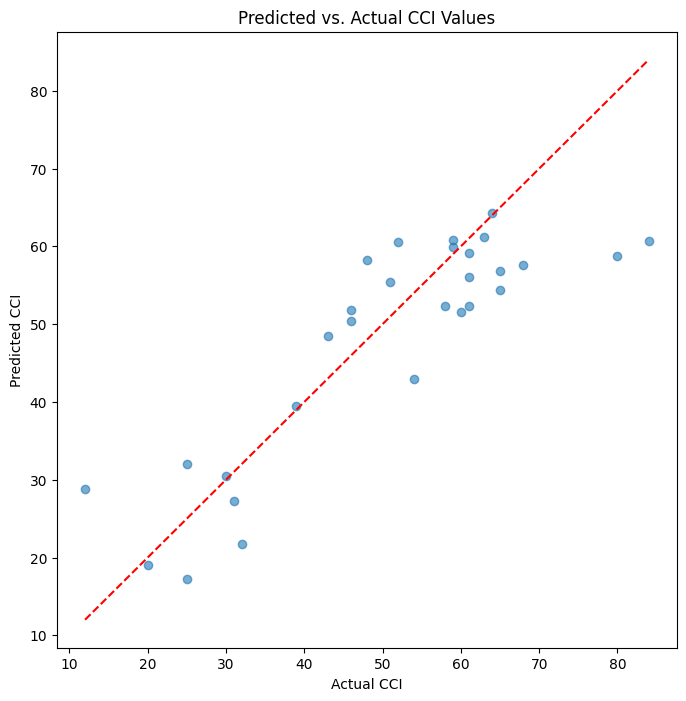

In [128]:
# Predicted vs. Actual Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel('Actual CCI')
plt.ylabel('Predicted CCI')
plt.title('Predicted vs. Actual CCI Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line y=x
plt.show()

##### ----------------------------------------------------

In [129]:
prediction_df = scaler.transform(train_df.iloc[:,1:])
predicted_cci = model.predict(prediction_df)

5/5 [==============================] - 0s 4ms/step


In [130]:
predicted_cci


array([[56.883377],
       [55.429695],
       [56.439877],
       [56.767628],
       [57.57972 ],
       [58.985325],
       [62.72293 ],
       [63.516598],
       [60.315388],
       [56.882763],
       [57.36471 ],
       [59.954647],
       [60.87283 ],
       [58.76764 ],
       [56.47623 ],
       [56.81091 ],
       [62.453663],
       [63.513065],
       [64.28151 ],
       [61.14363 ],
       [61.49558 ],
       [60.234188],
       [59.35244 ],
       [58.755325],
       [59.991405],
       [57.836823],
       [58.76698 ],
       [60.718735],
       [68.31498 ],
       [72.1308  ],
       [74.28875 ],
       [76.385315],
       [76.13016 ],
       [73.461685],
       [71.35488 ],
       [71.317085],
       [70.52766 ],
       [73.94893 ],
       [76.335724],
       [75.740814],
       [73.16467 ],
       [67.522835],
       [64.02297 ],
       [60.57592 ],
       [63.076656],
       [60.55781 ],
       [61.217133],
       [53.733036],
       [50.65069 ],
       [46.280792],


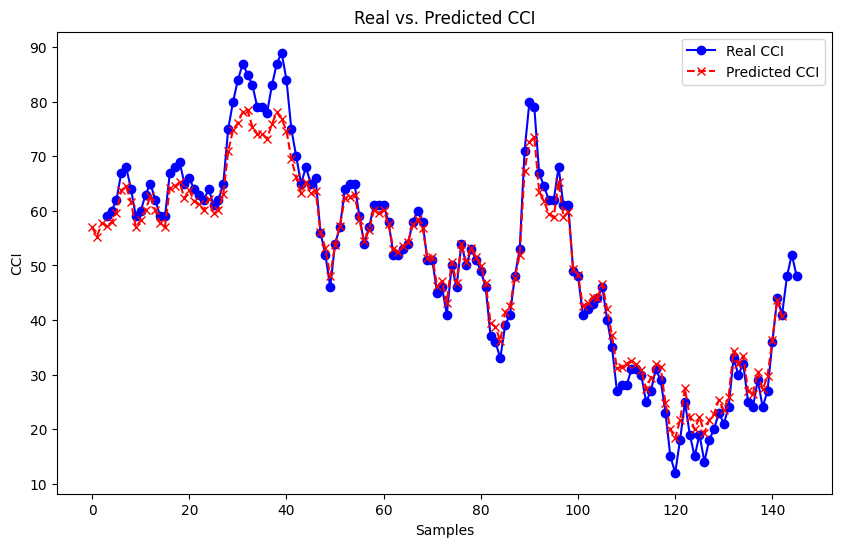

In [107]:
import matplotlib.pyplot as plt

# Plotting real vs. predicted CCI
plt.figure(figsize=(10, 6))
plt.plot(train_df.iloc[:,0], label="Real CCI", marker="o", linestyle="-", color="blue")
plt.plot(predicted_cci, label="Predicted CCI", marker="x", linestyle="--", color="red")
plt.title("Real vs. Predicted CCI")
plt.xlabel("Samples")
plt.ylabel("CCI")
plt.legend()
plt.show()


In [ ]:
!where python

c:\Users\Admin\.conda\envs\py310\python.exe
C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\python.exe
